In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

from scipy.fft import fft, ifft, fftfreq, fftshift

# 0. Creating the signal

In [391]:
sample_rate = 48000  # samples per second
n_samples = 2*sample_rate  # 2 seconds
time = np.arange(n_samples) / sample_rate

# Signal
amplitude = np.zeros(n_samples)
amplitude[48000:52800] = 1.

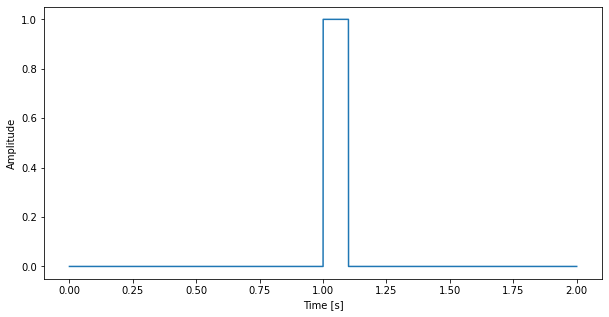

In [392]:
plt.figure(figsize=(10, 5))
plt.plot(time, amplitude)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# 1. Analyzing the signal

In [395]:
yf = fft(amplitude)
xf = fftfreq(n_samples, 1/sample_rate)

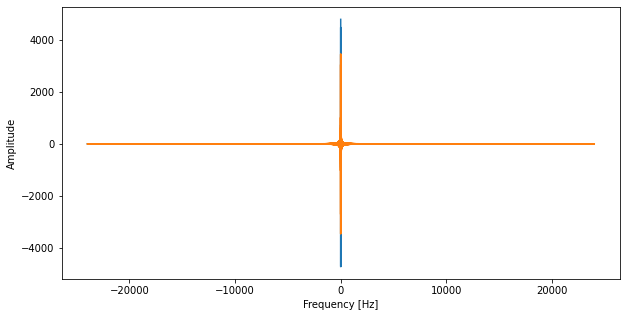

In [397]:
plt.figure(figsize=(10, 5))
plt.plot(xf, yf.real)
plt.plot(xf, yf.imag)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

In [398]:
# list(yf)

In [399]:
yf[yf.real>0.01]  # big real peak at f=0

array([4800.           -0.j        , 4490.44404728-1458.7087961j ,
       3633.11376823-2638.88511917j, ..., 2422.50000902+3332.90883284j,
       3633.11376823+2638.88511917j, 4490.44404728+1458.7087961j ])

In [400]:
yf[yf.imag>1000]  # big phase shift for f=0

array([-4.12049581e+03+2098.98795557j, -3.05627488e+03+3055.27488009j,
       -1.76663231e+03+3465.24852534j, -5.25579056e+02+3312.06180981j,
        4.28245534e+02+2710.14963933j,  9.50042139e+02+1866.52529293j,
        1.01809155e+03+1019.09155398j, -1.63783475e+02+1027.77441486j,
        1.00000000e+00+1018.59130854j, -1.03727922e+03+1429.06874428j,
       -7.47486880e+02+2303.60574856j,  1.00000000e+00+3055.77479828j,
        1.12349162e+03+3454.67398994j,  2.42250001e+03+3332.90883284j,
        3.63311377e+03+2638.88511917j,  4.49044405e+03+1458.7087961j ])

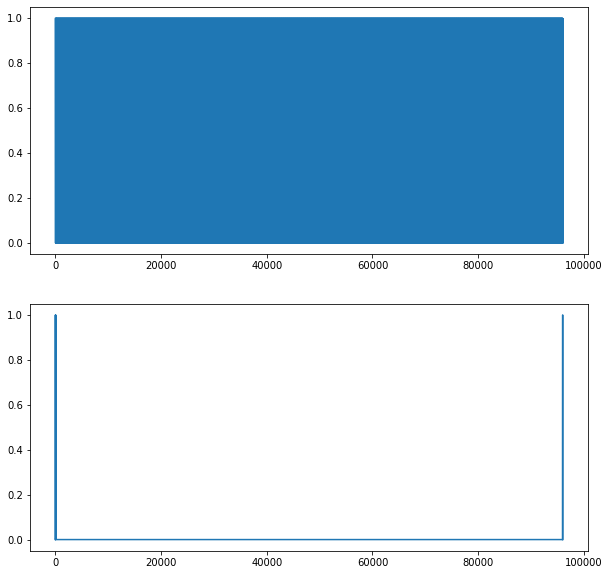

In [401]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(np.arange(yf.shape[0]), yf.real>0.01)
axs[1].plot(np.arange(yf.shape[0]),yf.imag>1000)

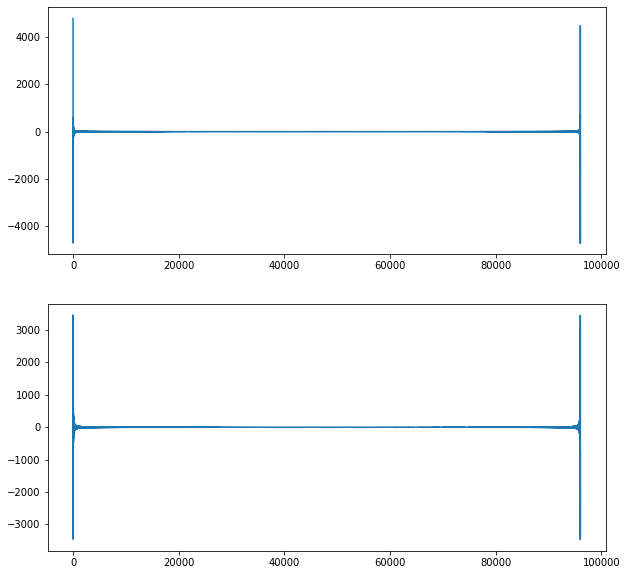

In [402]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(np.arange(yf.shape[0]), yf.real)
axs[1].plot(np.arange(yf.shape[0]),yf.imag)

# 2. Manually shifting the signal

In [403]:
yf = fft(amplitude)
xf = fftfreq(n_samples, 1/sample_rate)
yf[xf<0]=0

In [416]:
yf_new = yf.copy()
k = 0.5  # Move by 0.5s  #! Issue: cannot move by more than the signal itself
yf_new *= np.exp(-1j * 2 * np.pi * xf * k)

In [417]:
signal_new = ifft(yf_new, n_samples)

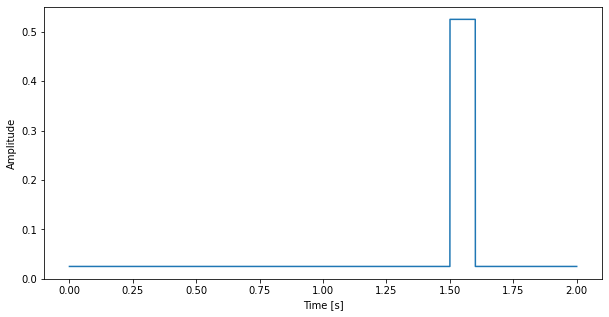

In [418]:
plt.figure(figsize=(10, 5))
plt.plot(time, signal_new.real)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()